# Linear Regression/ Hồi quy tuyến tính

# Import một số thư viện
## sklearn là thư viện Scikit Learn, chuyên cho Machine Learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

## Đọc dữ liệu từ bảng ở file csv, có thể đọc được từ file excel, txt...

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:title={'center':'Weight and Height'}, xlabel='Height', ylabel='Weight'>

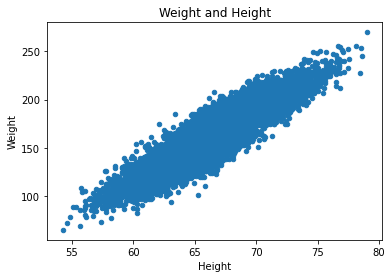

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height')

## Lấy data ở cột Height, Weight, chuyển nó thành array, rồi lật nó từ vector ngang thành vector dọc (reshape)

In [5]:
X = np.asarray(df['Height']).reshape(-1, 1)
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [6]:
y = np.asarray(df['Weight']).reshape(-1, 1)
y 

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

# Train cho model
## Chạy hàm fit() để train

In [7]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

# Kết quả:
## Hệ số góc của đường thẳng là coef_, còn gọi là weight
## Hệ số tự do của đường thẳng là intercept_, còn gọi là bias

In [8]:
# Hệ số góc, weight
w = regression.coef_

In [9]:
# Hệ số chặn, bias
b = regression.intercept_ 

## Tạo 1 mảng x để vẽ đường thẳng

In [10]:
x = np.linspace(55, 80, 100).reshape(-1,1)

## Dùng hàm predict() để tính giá trị dự đoán của model

In [11]:
yhat = regression.predict(x)

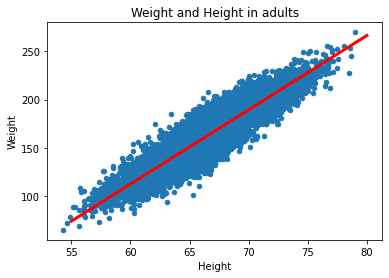

In [12]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

# Loss Function / Hàm mất mát

### Dùng hàm mean_squared_error của module sklearn.metrics để tự động tính sai số quân phương

In [13]:
y_pred = regression.predict(X)

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred, squared=False)

12.218571272826035

# Chỉ số R bình phương

In [49]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8551742120609958

# Train Test Split

## Import hàm train_test_split, nó sẽ tự động chia data thành tập huấn luyện và tập kiểm thử theo tỉ lệ mình yêu cầu

In [50]:
from sklearn.model_selection import train_test_split

## Chia 20% data để kiểm thử, 80% để huấn luyện

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [52]:
len(X_train)

8000

In [53]:
len(X_test)

2000

In [54]:
len(y_train)

8000

In [55]:
len(y_test)

2000

## Train lại

In [56]:
regression.fit(X_train, y_train)

LinearRegression()

## Tính giá trị dự đoán cho tập test và tập train (thường thì chỉ cần tính giá trị cho tập test)

In [57]:
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

## Tính giá trị loss function trên tập huấn luyện

In [58]:
mean_squared_error(y_train, y_train_pred, squared=False)

12.291215418059755

## Tính cost function trên tập kiểm thử

In [59]:
mean_squared_error(y_test, y_test_pred, squared=False)

11.923764784387522

## Nhận xét: loss trên tập train khác loss trên tập test

## Tương tự với chỉ số R bình phương

In [60]:
r2_score(y_train, y_train_pred)

0.8547101510161353

In [61]:
r2_score(y_test, y_test_pred)

0.8569823856544043

## Có thể chỉ cần tính loss và R bình của tập test là đủ

# Bài tập tự luyện
## 1. Load dữ liệu từ file ../data/winequality-red.csv
## 2. Output là quality, input là các cột còn lại, tiến hành train-test split, traning, kiểm thử... như trong bài học
### Không cần vẽ đồ thị vì có nhiều biến
### Sử dụng lệnh X = np.asarray(df.drop(['quality'], axis = 1)) để lấy input ra khỏi bảng
### train-test split
### Training
### Kiểm thử: tính R bình phương, mean square error